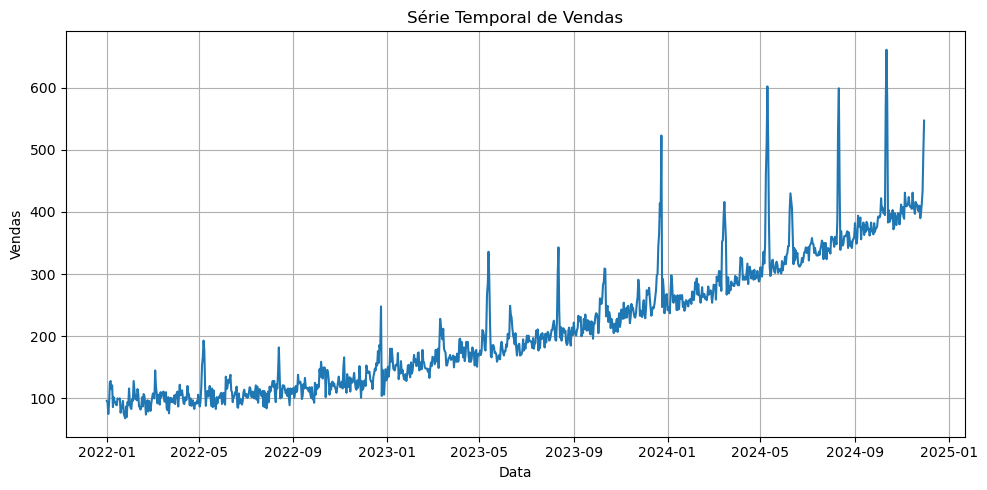

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo
caminho_arquivo = r"C:\Users\Home\OneDrive\Área de Trabalho\Análise Preditiva\Dataset.xlsx"

# Lê o Excel e já converte a coluna 'datas' para datetime
df = pd.read_excel(caminho_arquivo, parse_dates=["datas"])

# Ordena os dados por data
df.sort_values("datas", inplace=True)

# Garante que o índice seja a data (opcional, mas útil para séries temporais)
df.set_index("datas", inplace=True)

# ----------------------------------------
# 1. Série temporal com as vendas
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["vendas"])
plt.title("Série Temporal de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.grid(True)
plt.tight_layout()
plt.show()


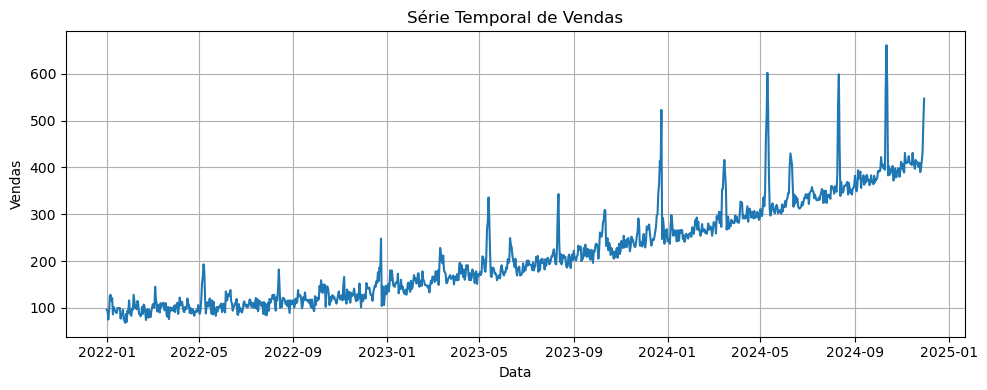

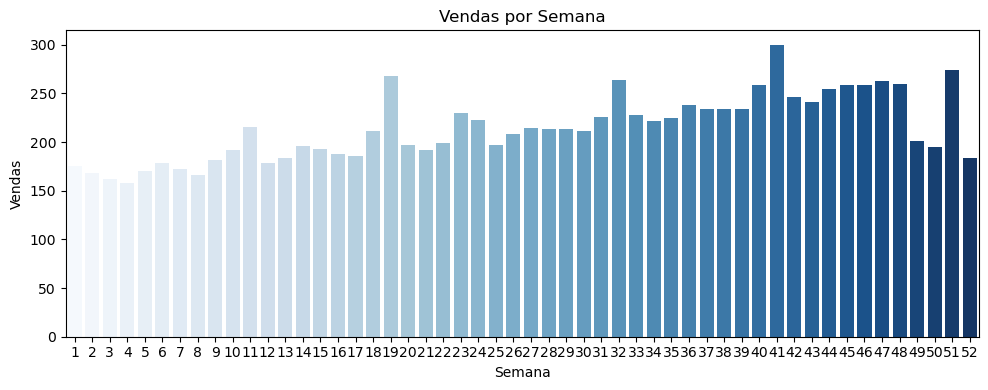

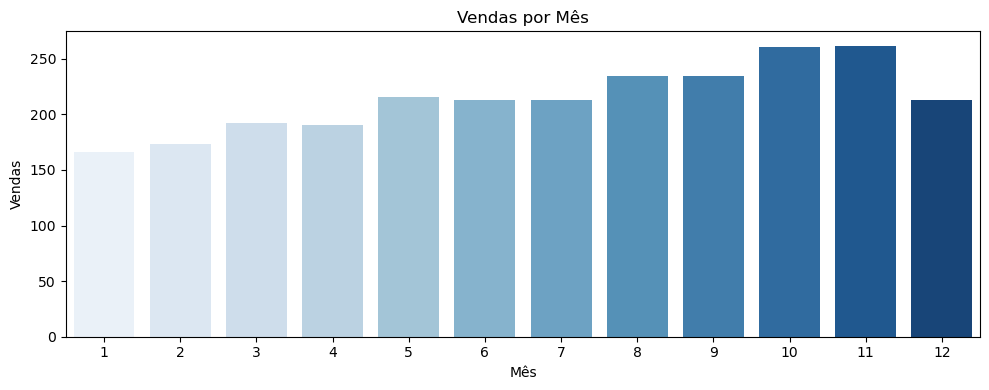

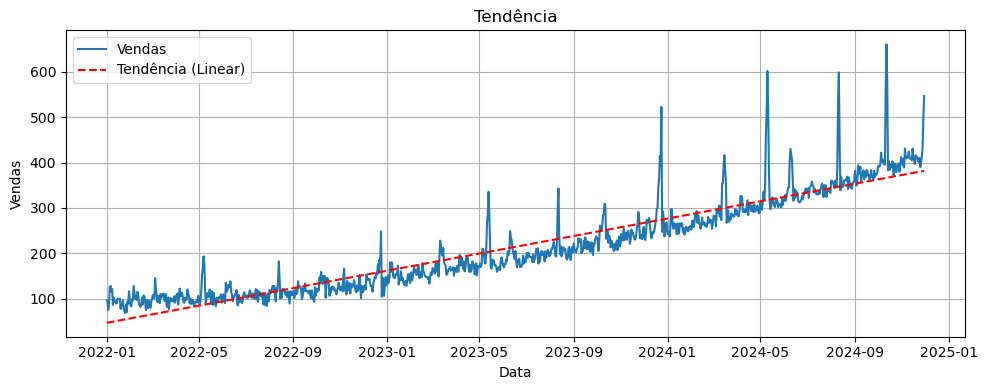

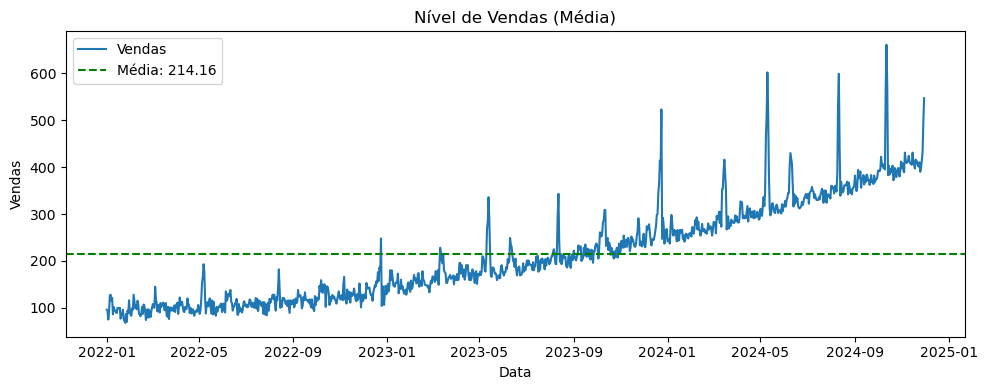

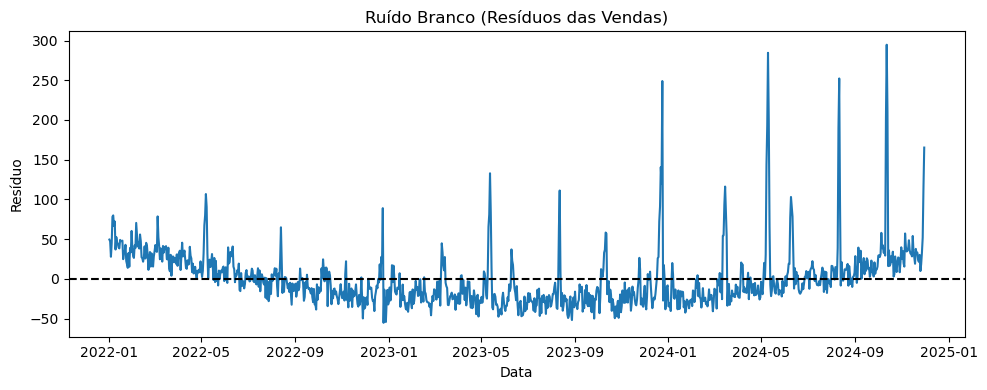

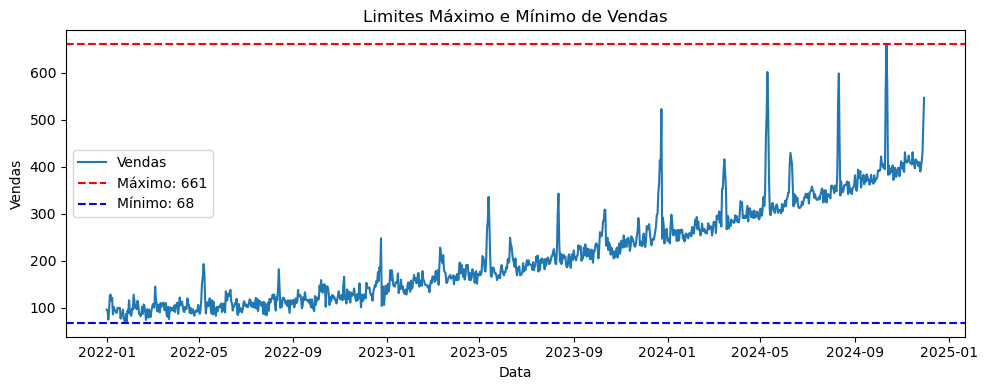

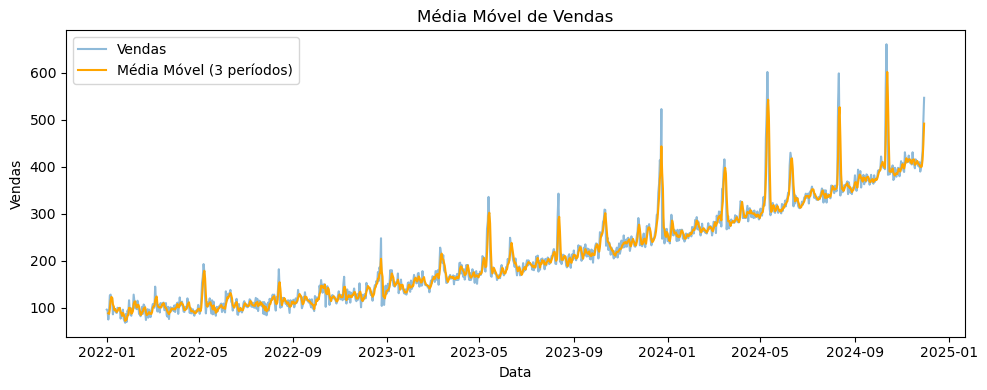

Média das vendas: 214.16
Desvio padrão das vendas: 103.57
Valor máximo: 661.00
Valor mínimo: 68.00


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Caminho do arquivo Excel
caminho_arquivo = r"C:\Users\Home\OneDrive\Área de Trabalho\Análise Preditiva\Dataset.xlsx"

# Lê o Excel com conversão automática da coluna 'datas' para datetime
df = pd.read_excel(caminho_arquivo, parse_dates=["datas"])

# Ordena os dados por data
df.sort_values("datas", inplace=True)

# Define a coluna de datas como índice
df.set_index("datas", inplace=True)

# Cria colunas auxiliares para análise semanal e mensal
df["semana"] = df.index.isocalendar().week
df["mes"] = df.index.month

# ------------------ GRÁFICO 1: Série Temporal ------------------
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"])
plt.title("Série Temporal de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 2: Vendas por Semana ------------------
plt.figure(figsize=(10, 4))
sns.barplot(x="semana", y="vendas", data=df, ci=None, palette="Blues")
plt.title("Vendas por Semana")
plt.xlabel("Semana")
plt.ylabel("Vendas")
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 3: Vendas por Mês ------------------
plt.figure(figsize=(10, 4))
sns.barplot(x="mes", y="vendas", data=df, ci=None, palette="Blues")
plt.title("Vendas por Mês")
plt.xlabel("Mês")
plt.ylabel("Vendas")
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 4: Tendência (Regressão Linear) ------------------
from sklearn.linear_model import LinearRegression

# Cria uma coluna numérica representando o tempo (dias)
df["tempo"] = np.arange(len(df))

# Ajusta um modelo de regressão
X = df["tempo"].values.reshape(-1, 1)
y = df["vendas"].values
modelo = LinearRegression()
modelo.fit(X, y)
tendencia = modelo.predict(X)

plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"], label="Vendas")
plt.plot(df.index, tendencia, label="Tendência (Linear)", color="red", linestyle="--")
plt.title("Tendência")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 5: Nível Médio de Vendas ------------------
media_geral = df["vendas"].mean()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"], label="Vendas")
plt.axhline(media_geral, color="green", linestyle="--", label=f"Média: {media_geral:.2f}")
plt.title("Nível de Vendas (Média)")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 6: Ruído Branco (vendas - tendência) ------------------
residuos = df["vendas"] - tendencia

plt.figure(figsize=(10, 4))
plt.plot(df.index, residuos)
plt.title("Ruído Branco (Resíduos das Vendas)")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Data")
plt.ylabel("Resíduo")
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 7: Limites Máximo e Mínimo ------------------
maximo = df["vendas"].max()
minimo = df["vendas"].min()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"], label="Vendas")
plt.axhline(maximo, color="red", linestyle="--", label=f"Máximo: {maximo}")
plt.axhline(minimo, color="blue", linestyle="--", label=f"Mínimo: {minimo}")
plt.title("Limites Máximo e Mínimo de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------ GRÁFICO 8: Média Móvel ------------------
df["media_movel"] = df["vendas"].rolling(window=3).mean()

plt.figure(figsize=(10, 4))
plt.plot(df.index, df["vendas"], label="Vendas", alpha=0.5)
plt.plot(df.index, df["media_movel"], label="Média Móvel (3 períodos)", color="orange")
plt.title("Média Móvel de Vendas")
plt.xlabel("Data")
plt.ylabel("Vendas")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------ MÉTRICAS ESTATÍSTICAS ------------------
print(f"Média das vendas: {df['vendas'].mean():.2f}")
print(f"Desvio padrão das vendas: {df['vendas'].std():.2f}")
print(f"Valor máximo: {df['vendas'].max():.2f}")
print(f"Valor mínimo: {df['vendas'].min():.2f}")


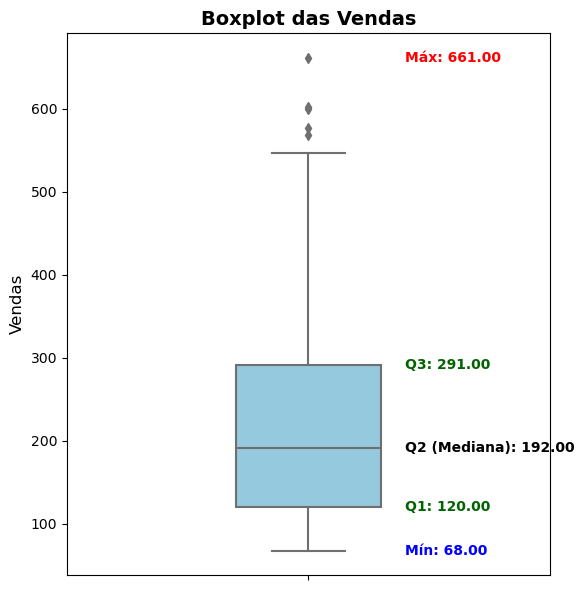

In [90]:
# ------------------ GRÁFICO 9: Boxplot com estatísticas descritivas ------------------
plt.figure(figsize=(6, 6))
sns.boxplot(y=df["vendas"], color="skyblue", width=0.3)
plt.title("Boxplot das Vendas", fontsize=14, fontweight='bold')
plt.ylabel("Vendas", fontsize=12)

# Estatísticas principais
q1 = df["vendas"].quantile(0.25)
q2 = df["vendas"].median()
q3 = df["vendas"].quantile(0.75)
minimo = df["vendas"].min()
maximo = df["vendas"].max()

# Coordenada horizontal para o texto à direita do boxplot
x_text = 0.2

# Anotações com alinhamento à direita e fonte estilizada
plt.text(x_text, minimo, f'Mín: {minimo:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='blue')
plt.text(x_text, q1, f'Q1: {q1:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='darkgreen')
plt.text(x_text, q2, f'Q2 (Mediana): {q2:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='black')
plt.text(x_text, q3, f'Q3: {q3:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='darkgreen')
plt.text(x_text, maximo, f'Máx: {maximo:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

# Carregar os dados
df = pd.read_excel("C:\\Users\\Home\\OneDrive\\Área de Trabalho\\Análise Preditiva\\Dataset.xlsx")

# Preparar a base
df['datas'] = pd.to_datetime(df['datas'])
df = df.sort_values('datas')
df.set_index('datas', inplace=True)

# Filtrar apenas os dados antes de dezembro/2024 para treinamento
df_train = df[df.index < '2024-12-01']

# Gerar o período futuro (dezembro de 2024)
futuro = pd.date_range(start='2024-12-01', end='2024-12-31', freq='D')


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

# Leitura dos dados
caminho_arquivo = "C:/Users/Home/OneDrive/Área de Trabalho/Análise Preditiva/Dataset.xlsx"
df = pd.read_excel(caminho_arquivo)

# Pré-processamento
df['datas'] = pd.to_datetime(df['datas'])
df.set_index('datas', inplace=True)
df = df.asfreq('D')
vendas = df['vendas']

# Definindo o horizonte de previsão para dezembro de 2024
inicio_previsao = pd.to_datetime("2024-12-01")
fim_previsao = pd.to_datetime("2024-12-31")
periodo_previsao = pd.date_range(start=inicio_previsao, end=fim_previsao, freq='D')
n_periodos = len(periodo_previsao)

# Funções de erro
def calcular_erros(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mad = mean_absolute_error(y_true, y_pred)
    erro_padrao = np.std(y_true - y_pred)
    return {'MAPE': mape, 'RMSE': rmse, 'MAD': mad, 'Erro Padrão': erro_padrao}

# Plotagem
def plot_forecasts(nome, real, previsto, futuro, ultimos=False):
    plt.figure(figsize=(14, 5))
    if ultimos:
        real = real[real.index >= real.index[-90]]
        previsto = previsto[previsto.index >= real.index[0]]
    plt.plot(real, label='Vendas Reais', color='black')
    plt.plot(previsto, label='Previsão Interna', color='blue')
    plt.plot(futuro, '--', color='red', label='Previsão Dezembro')
    plt.title(f'{nome} - {"Últimos Meses" if ultimos else "Histórico Completo"}')
    plt.xlabel("Data")
    plt.ylabel("Vendas")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Armazenar previsões e erros
resultados = {}

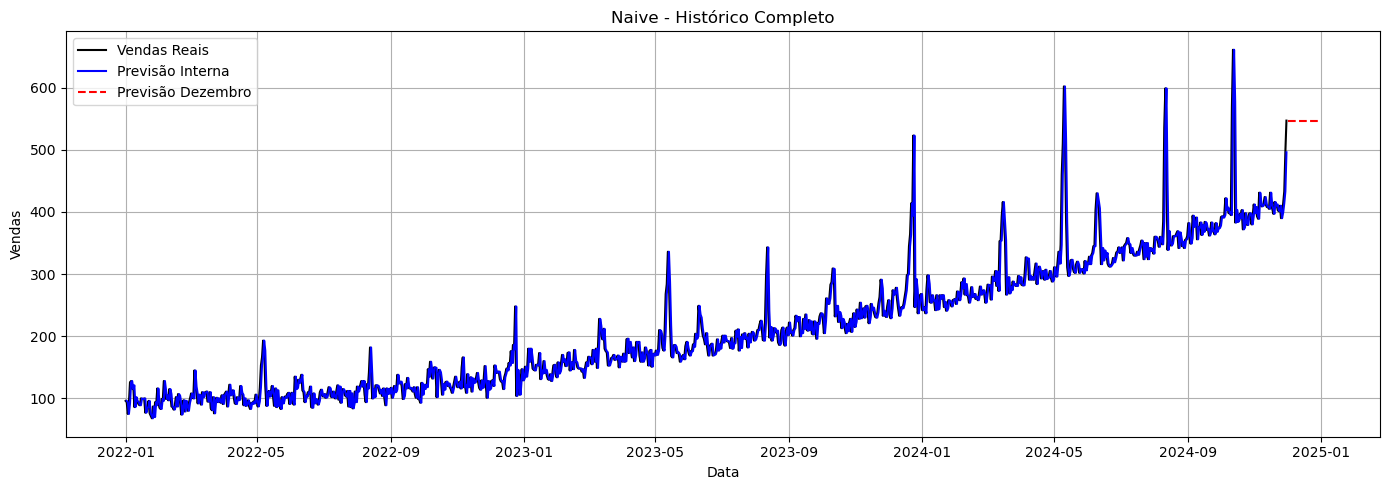

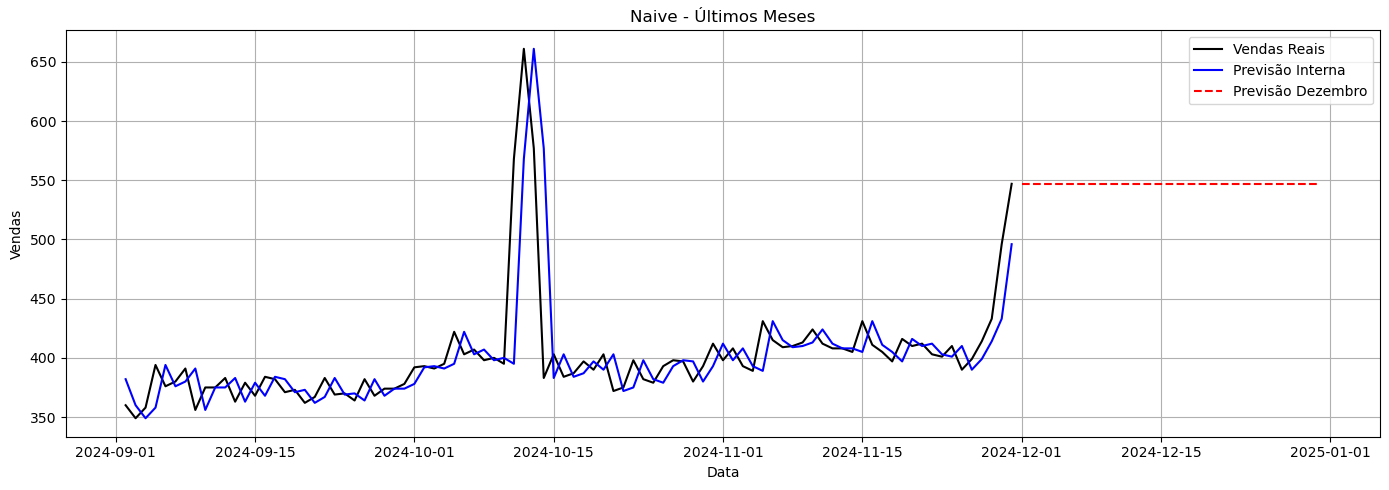

In [94]:
# Modelo 1 - Naive
naive_previsto = pd.Series(vendas.shift(1), index=vendas.index)
naive_futuro = pd.Series([vendas.iloc[-1]] * n_periodos, index=periodo_previsao)
erros_naive = calcular_erros(vendas[1:], naive_previsto[1:])
resultados['Naive'] = erros_naive
plot_forecasts("Naive", vendas, naive_previsto, naive_futuro, ultimos=False)
plot_forecasts("Naive", vendas, naive_previsto, naive_futuro, ultimos=True)

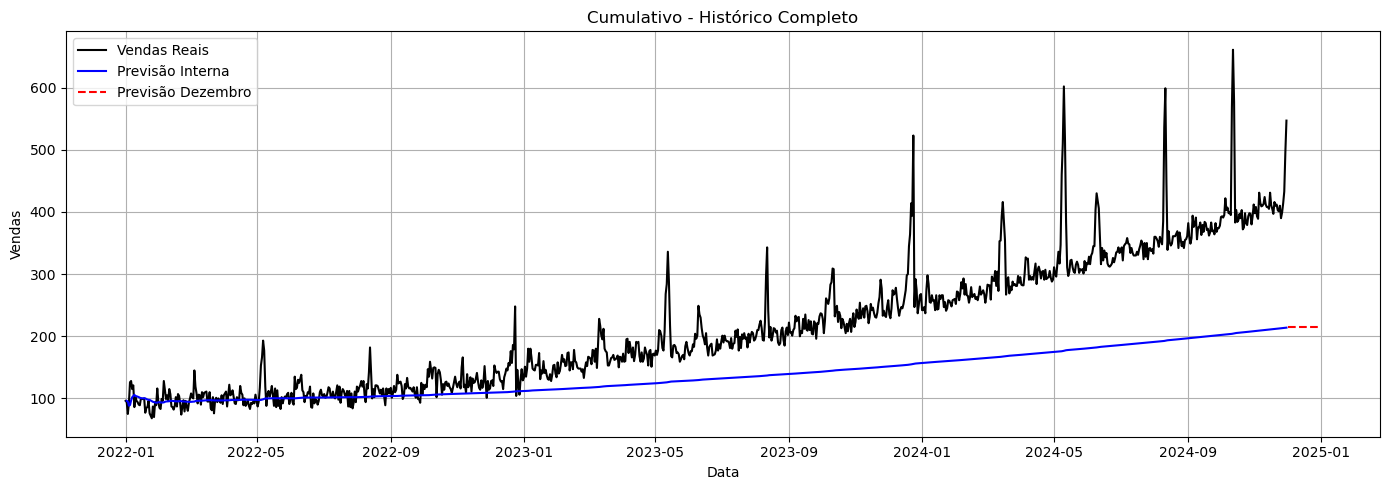

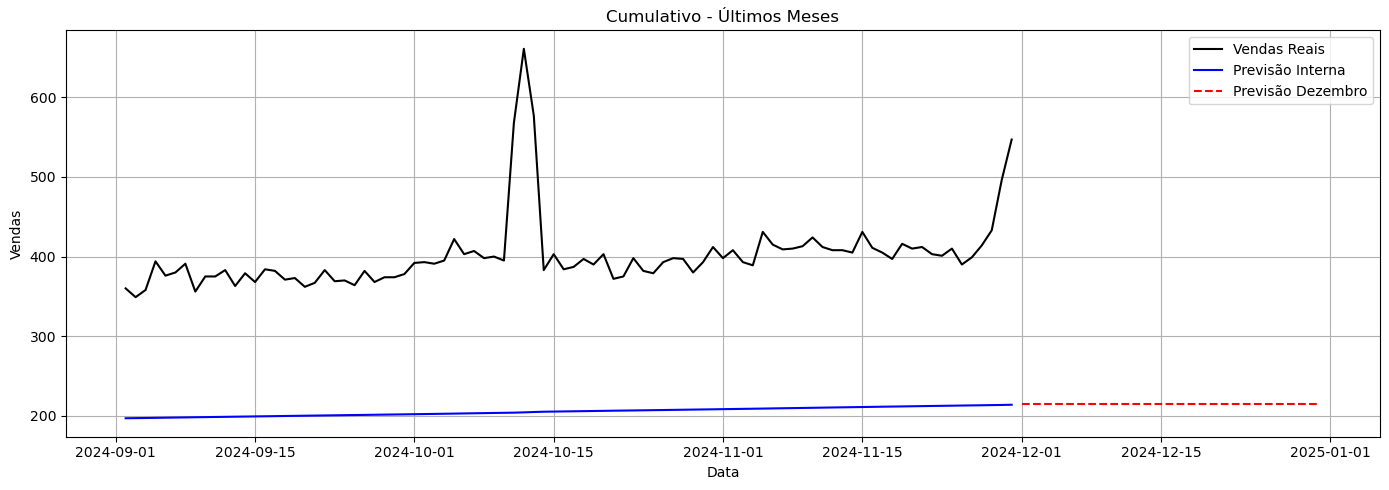

In [95]:
# Modelo 2 - Cumulativo
cumulativo_previsto = vendas.expanding().mean().shift(1)
cumulativo_futuro = pd.Series(vendas.mean(), index=periodo_previsao)
erros_cumulativo = calcular_erros(vendas[1:], cumulativo_previsto[1:])
resultados['Cumulativo'] = erros_cumulativo
plot_forecasts("Cumulativo", vendas, cumulativo_previsto, cumulativo_futuro, ultimos=False)
plot_forecasts("Cumulativo", vendas, cumulativo_previsto, cumulativo_futuro, ultimos=True)

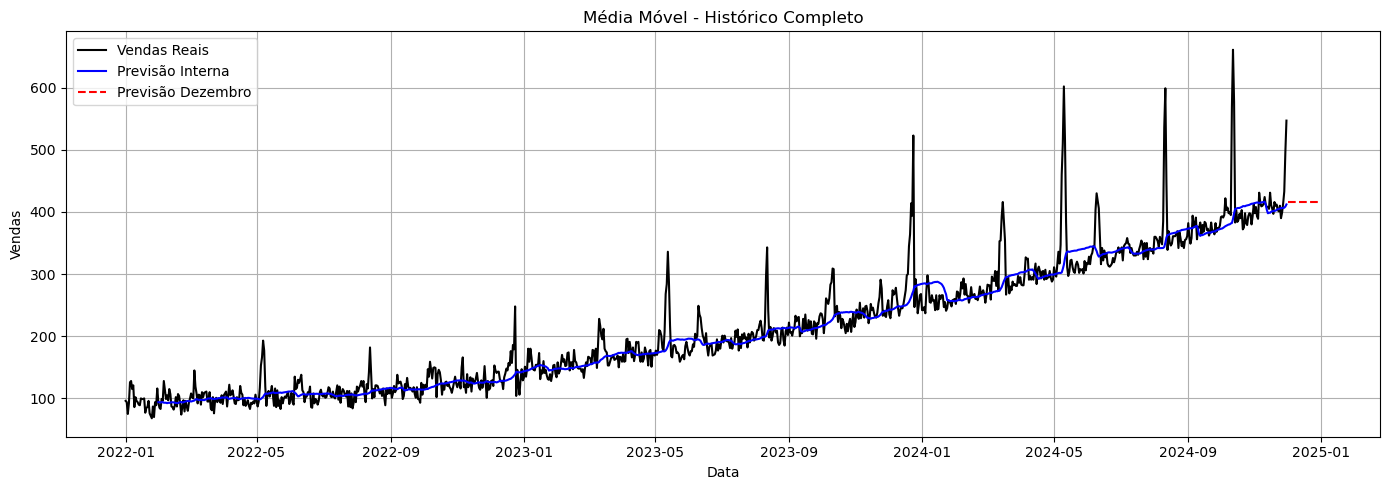

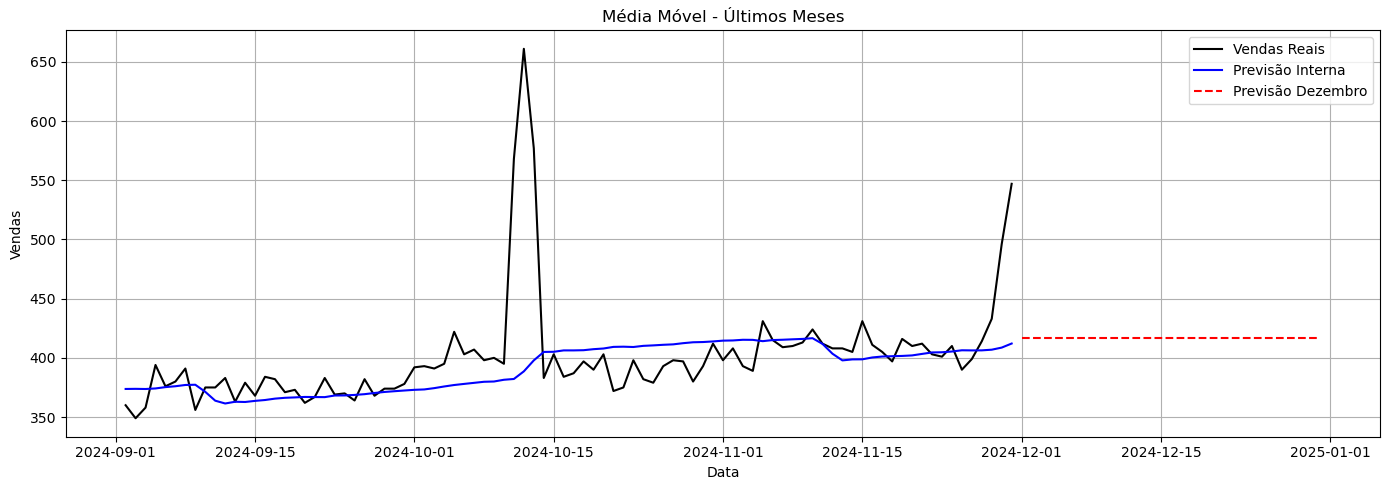

In [96]:

# Modelo 3 - Média Móvel (30 dias)
media_movel_previsto = vendas.rolling(window=30).mean().shift(1)
media_movel_futuro = pd.Series(vendas.rolling(window=30).mean().iloc[-1], index=periodo_previsao)
erros_media_movel = calcular_erros(vendas[30:], media_movel_previsto[30:])
resultados['Média Móvel'] = erros_media_movel
plot_forecasts("Média Móvel", vendas, media_movel_previsto, media_movel_futuro, ultimos=False)
plot_forecasts("Média Móvel", vendas, media_movel_previsto, media_movel_futuro, ultimos=True)

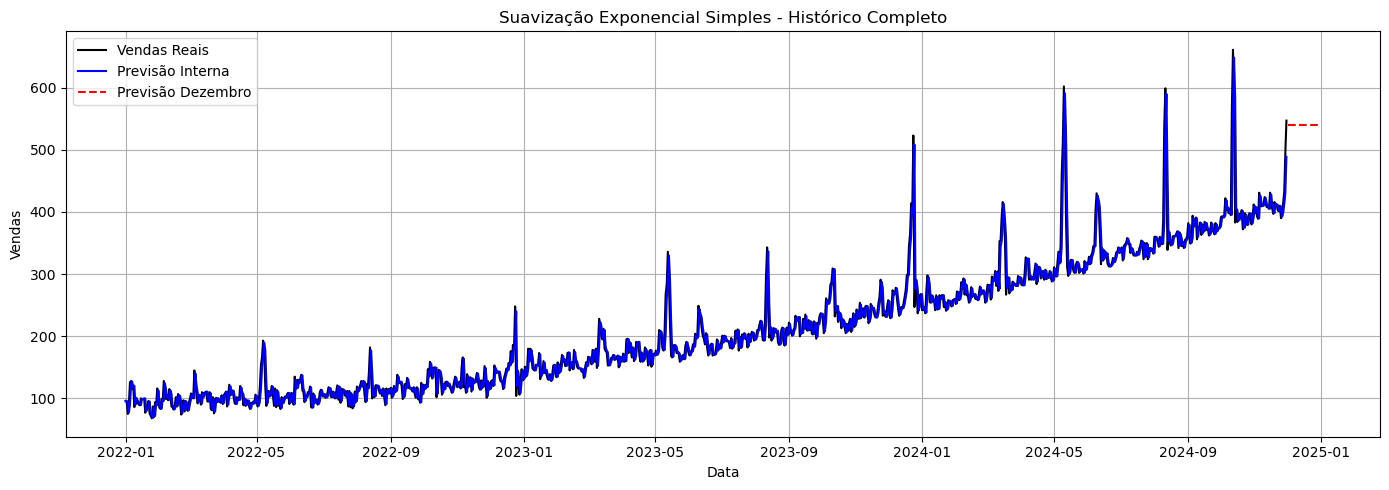

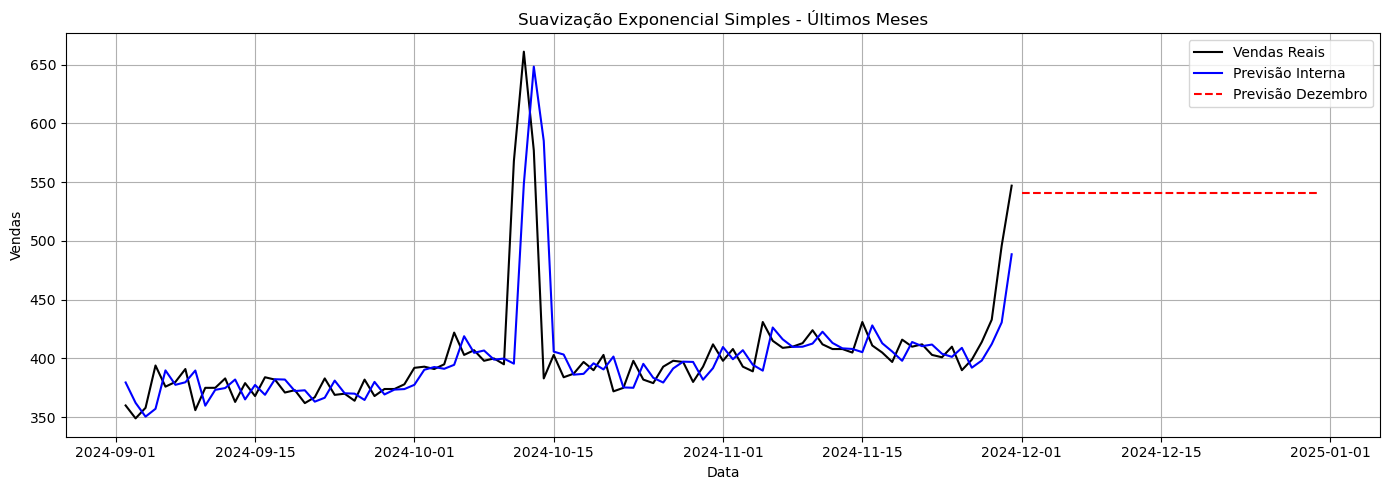

In [97]:

# Modelo 4 - Suavização Exponencial Simples
ses_model = SimpleExpSmoothing(vendas, initialization_method="heuristic").fit()
ses_previsto = ses_model.fittedvalues
ses_futuro = pd.Series(ses_model.forecast(n_periodos), index=periodo_previsao)
erros_ses = calcular_erros(vendas[1:], ses_previsto[1:])
resultados['SES'] = erros_ses
plot_forecasts("Suavização Exponencial Simples", vendas, ses_previsto, ses_futuro, ultimos=False)
plot_forecasts("Suavização Exponencial Simples", vendas, ses_previsto, ses_futuro, ultimos=True)

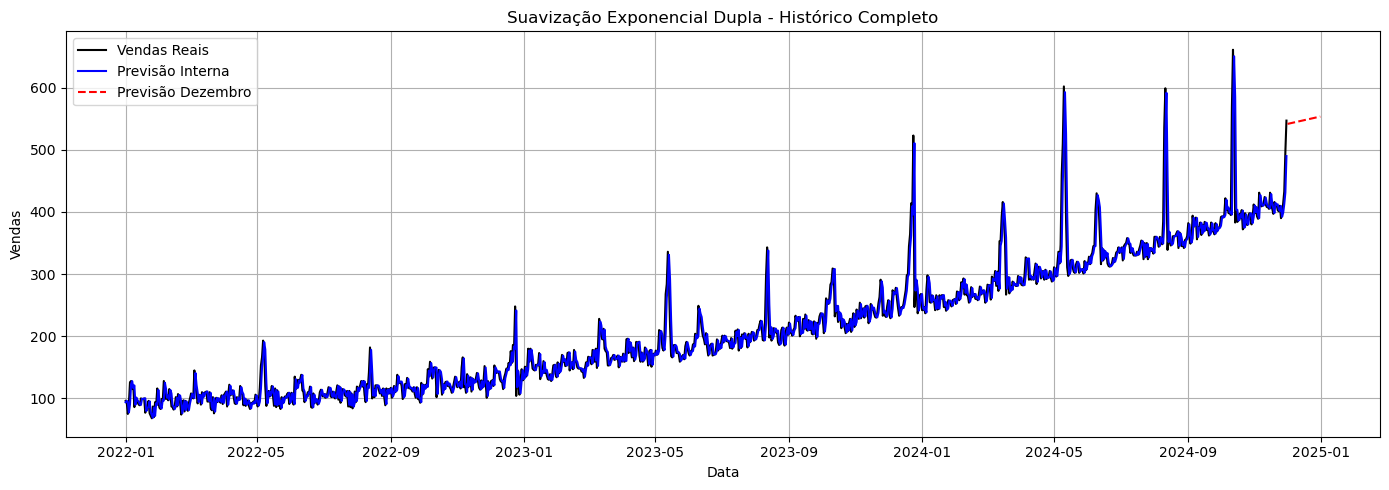

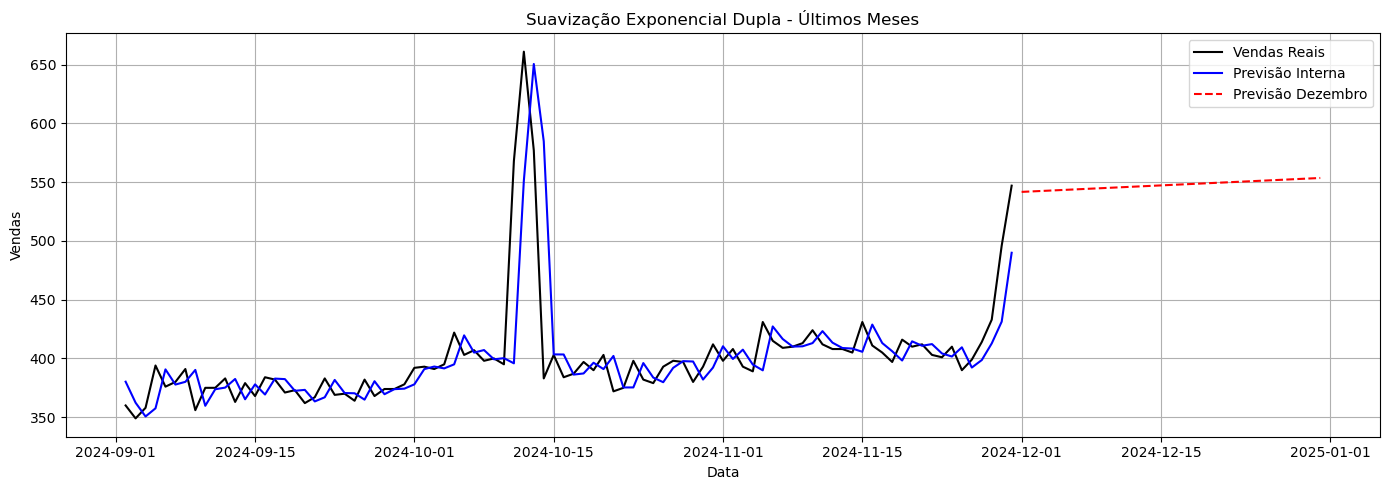

In [98]:
# Modelo 5 - Suavização Exponencial Dupla
des_model = ExponentialSmoothing(vendas, trend='add', seasonal=None, initialization_method="estimated").fit()
des_previsto = des_model.fittedvalues
des_futuro = pd.Series(des_model.forecast(n_periodos), index=periodo_previsao)
erros_des = calcular_erros(vendas, des_previsto)
resultados['DES'] = erros_des
plot_forecasts("Suavização Exponencial Dupla", vendas, des_previsto, des_futuro, ultimos=False)
plot_forecasts("Suavização Exponencial Dupla", vendas, des_previsto, des_futuro, ultimos=True)

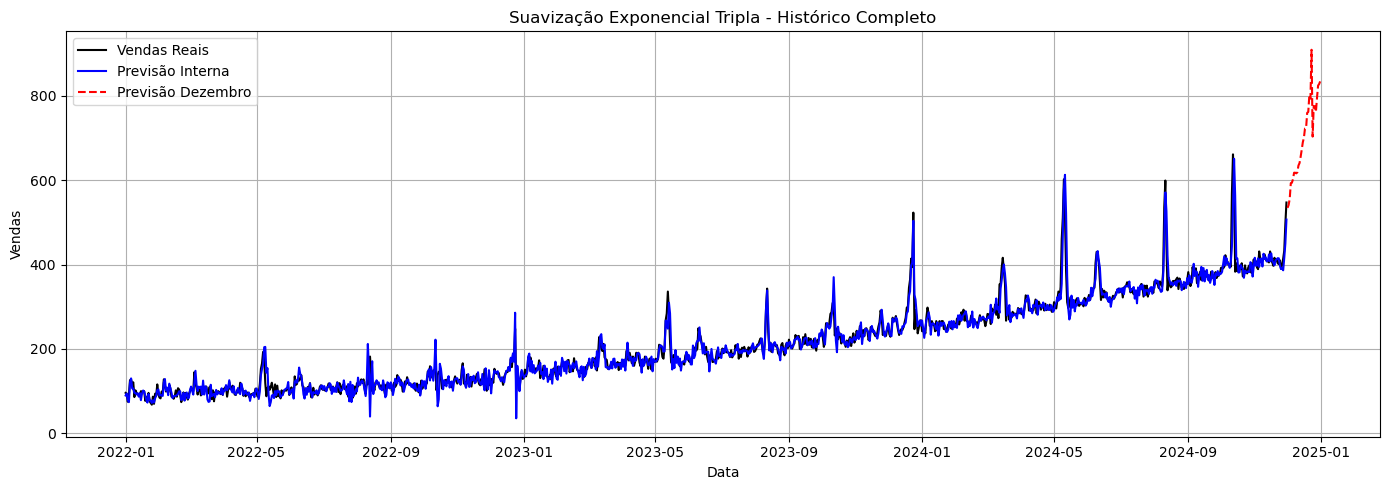

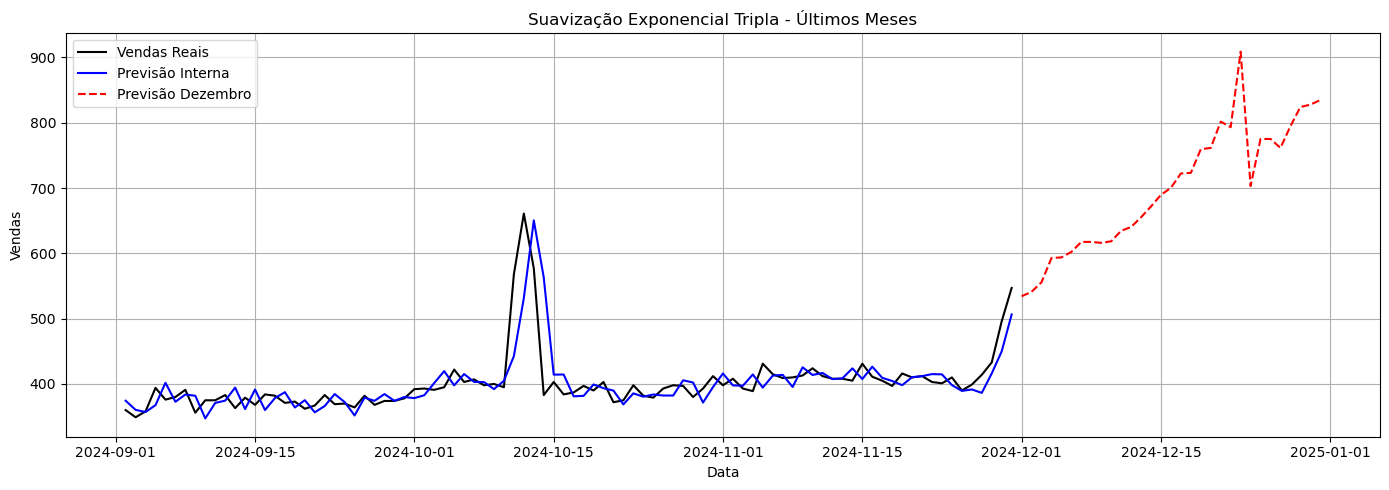

In [99]:
# Modelo 6 - Suavização Exponencial Tripla
tes_model = ExponentialSmoothing(vendas, trend='add', seasonal='add', seasonal_periods=365, initialization_method="estimated").fit()
tes_previsto = tes_model.fittedvalues
tes_futuro = pd.Series(tes_model.forecast(n_periodos), index=periodo_previsao)
erros_tes = calcular_erros(vendas, tes_previsto)
resultados['TES'] = erros_tes
plot_forecasts("Suavização Exponencial Tripla", vendas, tes_previsto, tes_futuro, ultimos=False)
plot_forecasts("Suavização Exponencial Tripla", vendas, tes_previsto, tes_futuro, ultimos=True)

In [100]:
# Tabela de erros
erros_df = pd.DataFrame(resultados).T
erros_df

,MAPE,RMSE,MAD,Erro Padrão
Naive,7.865569,24.297092,14.632519,24.293395
Cumulativo,29.514403,103.642450,77.876624,70.317621
Média Móvel,8.062236,32.237989,17.420354,31.849343
SES,7.610436,24.178836,14.262301,24.174250
DES,7.641050,24.171326,14.277851,24.170968
TES,6.906871,20.317505,12.765021,20.316507


In [101]:
# Suavização Exponencial Simples (SES)
ses_model = SimpleExpSmoothing(df['vendas']).fit()
print(f"SES - Suavização Exponencial Simples:")
print(f"  Alfa (α): {ses_model.model.params['smoothing_level']:.4f}")
print()

# Suavização Exponencial Dupla (Holt)
holt_model = Holt(df['vendas']).fit()
print(f"Holt - Suavização Exponencial Dupla:")
print(f"  Alfa (α): {holt_model.model.params['smoothing_level']:.4f}")
print(f"  Beta (β): {holt_model.model.params['smoothing_trend']:.4f}")
print()

# Suavização Exponencial Tripla (Holt-Winters)
hw_model = ExponentialSmoothing(
    df['vendas'], trend='add', seasonal='add', seasonal_periods=12
).fit()
print(f"Holt-Winters - Suavização Exponencial Tripla:")
print(f"  Alfa (α): {hw_model.model.params['smoothing_level']:.4f}")
print(f"  Beta (β): {hw_model.model.params['smoothing_trend']:.4f}")
print(f"  Gama (γ): {hw_model.model.params['smoothing_seasonal']:.4f}")
print()

SES - Suavização Exponencial Simples:
  Alfa (α): 0.8872

Holt - Suavização Exponencial Dupla:
  Alfa (α): 0.9003
  Beta (β): 0.0001

Holt-Winters - Suavização Exponencial Tripla:
  Alfa (α): 0.8900
  Beta (β): 0.0019
  Gama (γ): 0.0242



In [102]:
# Função para calcular os limites de outliers
def limites(serie):
    q1 = serie.quantile(0.25)
    q3 = serie.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

# Função para excluir outliers
def excluir_outliers(df, nome_coluna):
    qtde_linhas_antes = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df_filtrado = df[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup)]
    qtde_linhas_depois = df_filtrado.shape[0]
    linhas_removidas = qtde_linhas_antes - qtde_linhas_depois
    return df_filtrado, linhas_removidas

# Aplicação da função
df_filtrado, linhas_removidas = excluir_outliers(df, 'vendas')

# (Opcional) salvar o novo DataFrame
# df_filtrado.to_csv("arquivo_sem_outliers.csv", index=False)

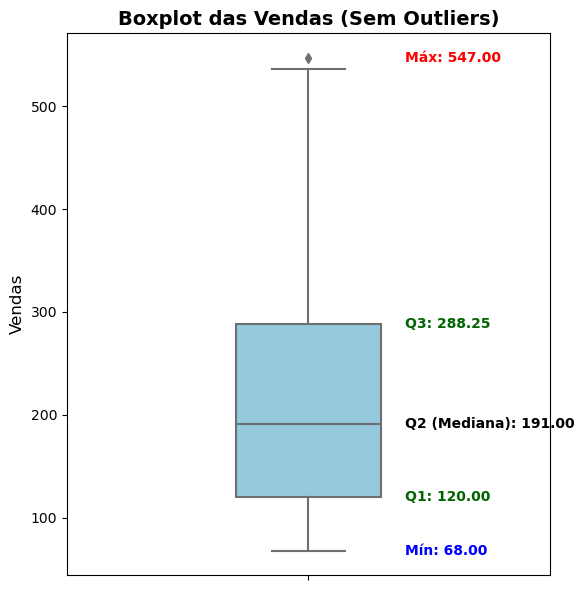

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ NOVO GRÁFICO: Boxplot com estatísticas descritivas ------------------
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_filtrado["vendas"], color="skyblue", width=0.3)
plt.title("Boxplot das Vendas (Sem Outliers)", fontsize=14, fontweight='bold')
plt.ylabel("Vendas", fontsize=12)

# Estatísticas principais com base no DataFrame filtrado
q1 = df_filtrado["vendas"].quantile(0.25)
q2 = df_filtrado["vendas"].median()
q3 = df_filtrado["vendas"].quantile(0.75)
minimo = df_filtrado["vendas"].min()
maximo = df_filtrado["vendas"].max()

# Coordenada horizontal para posicionar o texto (ao lado do boxplot)
x_text = 0.2

# Anotações das estatísticas
plt.text(x_text, minimo, f'Mín: {minimo:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='blue')
plt.text(x_text, q1, f'Q1: {q1:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='darkgreen')
plt.text(x_text, q2, f'Q2 (Mediana): {q2:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='black')
plt.text(x_text, q3, f'Q3: {q3:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='darkgreen')
plt.text(x_text, maximo, f'Máx: {maximo:.2f}', va='center', ha='left', fontsize=10, fontweight='bold', color='red')

plt.tight_layout()
plt.show()

In [105]:
# Imprimir os dados excluídos
print("\n\033[1mDados excluídos (outliers):\033[0m")
print(df_outliers)

# Mostrar resultado
print('\n\033[1m{} linhas removidas na coluna de Vendas\033[0m'.format(linhas_removidas))


Dados excluídos (outliers):
            vendas
datas             
2024-05-10     602
2024-08-11     599
2024-10-11     568
2024-10-12     661
2024-10-13     577

5 linhas removidas na coluna de Vendas
